In [19]:
import tgt
import pandas
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import os

BIRDDB_PATH = "../birddb/"

In [11]:
# Get the CAVI textgrid files

db = pandas.read_csv(os.path.join(BIRDDB_PATH, "birddb.csv"))

cavi = db[db['Species_short_name'] == 'CAVI']
tg_files = cavi['textgrid_filename']


In [69]:
# run through the textgrid files and collect the interval lengths

intervals = []
chatter_syllables = []

skipped_files = 0
skipped_intervals = 0
total_intervals = 0

for f_name in tg_files:
    path = os.path.join(BIRDDB_PATH, f_name)
    try:
        tg = tgt.read_textgrid(path)
    except Exception:
        skipped_files += 1

    interval_list = tg.tiers[0].intervals

    skipped_ints = 0
    for prev, curr in zip(interval_list, interval_list[1:]):
        duration = curr.start_time - prev.end_time
        
        total_intervals += 1
        if duration < 10:
            intervals.append(duration)
        else:
            skipped_intervals += 1
        
        if duration < 0.7:
            chatter_syllables.append( (prev.text, curr.text))
            

print("Total Intervals: %d" % total_intervals)
print("Skipped:")
print("Files: %d" % skipped_files)
print("Intervals: %d" % skipped_intervals)

Total Intervals: 74721
Skipped:
Files: 20
Intervals: 3318


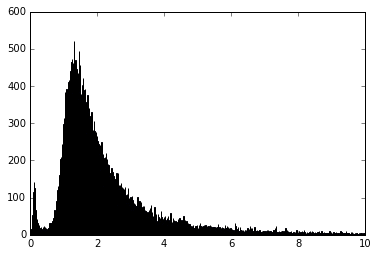

In [70]:

plt.hist(intervals, 1000)
plt.show()

CAVIs have 2 types of vocalizations, their standard songs, which consist of syllables with >= 1 second pauses between them (making up 99% of their speech) and chatter vocalizations, which have very short pauses between them. This histogram more or less agrees with that so that's nice.


In [71]:
from collections import Counter, OrderedDict

chat_counts = Counter(chatter_syllables)

chat_dict = OrderedDict(
    sorted(chat_counts.items(), key=lambda i: -1 * i[1])
)

chat_dict

OrderedDict([(('bm', 'el'), 144),
             (('ai', 'en'), 100),
             (('en', 'hg'), 86),
             (('br', 'bj'), 82),
             (('ak', 'an'), 66),
             (('bl', 'bu'), 64),
             (('fg', 'em'), 59),
             (('db', 'ci'), 54),
             (('da', 'jf'), 50),
             (('jo', 'dp'), 45),
             (('cr', 'fq'), 43),
             (('bu', 'di'), 39),
             (('ci', 'cj'), 38),
             (('fi', 'hg'), 34),
             (('ck', 'ea'), 34),
             (('an', 'dd'), 31),
             (('fc', 'fg'), 30),
             (('bz', 'hk'), 25),
             (('bm', 'am'), 22),
             (('he', 'cl'), 20),
             (('ec', 'ch'), 18),
             (('dl', 'Chatter'), 18),
             (('ak', 'dn'), 17),
             (('ea', 'he'), 16),
             (('aj', 'ak'), 14),
             (('ce', 'ib'), 14),
             (('eg', 'bj'), 14),
             (('ch', 'db'), 13),
             (('ed', 'bj'), 12),
             (('dl', 'ip'), 12),
   

Took chatter vocalization pairs (arbitarily picked as < 0.7s pause between them) and counted how many times they occurred. From the look of the dict, there are a few that are quite common but there's still many that appear just once or two.